# Take home practice challenge - Ultimate Inc.

## Part 1  

Exploratory data analysis The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
# Import necessary Libraries
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file read
file_open = open('logins.json')
file_str = file_open.read()
data = json.loads(file_str)

In [3]:
# conversion to datetime
dates= [datetime.strptime(date, '%Y-%m-%d %X') for date in data['login_time']]

In [4]:
# Creation of Timebins with intervak of 15 min
timemin = min(dates)
timemax = max(dates)
timediff = timedelta(weeks=0, days=0, hours=0, minutes=15, seconds=0)
timeIntervals = pd.date_range(start = timemin-timediff, end = timemax+timediff, freq = timediff)
print(timemin)
print(timemax)

1970-01-01 20:12:16
1970-04-13 18:57:38


In [5]:
df = pd.DataFrame(dates,columns=['date'])
df['bucket'] = pd.cut(df.date, bins = timeIntervals)
df_count = df.groupby('bucket').count()
df_count.rename(index=str,columns={'date':'count'})

,count
bucket,
"(1970-01-01 19:57:16, 1970-01-01 20:12:16]",1
"(1970-01-01 20:12:16, 1970-01-01 20:27:16]",7
"(1970-01-01 20:27:16, 1970-01-01 20:42:16]",8
"(1970-01-01 20:42:16, 1970-01-01 20:57:16]",6
"(1970-01-01 20:57:16, 1970-01-01 21:12:16]",3
"(1970-01-01 21:12:16, 1970-01-01 21:27:16]",3
"(1970-01-01 21:27:16, 1970-01-01 21:42:16]",1
"(1970-01-01 21:42:16, 1970-01-01 21:57:16]",1
"(1970-01-01 21:57:16, 1970-01-01 22:12:16]",12


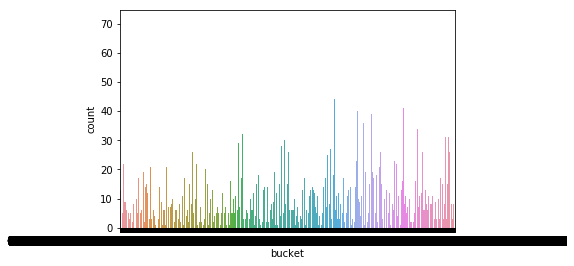

In [6]:
sns.countplot(data=df,x='bucket')

In [7]:
# Plotting for time of the day
from datetime import date
dt = datetime.today()
time_data= [datetime.combine(dt,datetime.strptime(date, '%Y-%m-%d %X').time()) for date in data['login_time']]

In [8]:
# Creating Intervals
startTime = dt.replace(hour=0,minute=0,second=0,microsecond=0)
endTime = dt.replace(hour=23,minute=59,second=59,microsecond=0)
timediff = timedelta(weeks=0, days=0, hours=0, minutes=15, seconds=0)
timeIntervals = pd.date_range(start = startTime, end = endTime, freq = '15 min')
df_time = pd.DataFrame(time_data,columns=['time'])

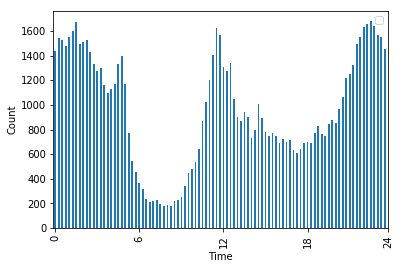

In [9]:
# Assigning intervals and plotting the results
df_time['bucket'],bins = pd.cut(df_time.time, bins = timeIntervals, retbins=True)
totalTimeCounts = df_time.groupby('bucket').count()
totalTimeCounts.plot(kind='bar')
tickpos = [0,int(len(bins)/4),int(2*len(bins)/4),int(3*len(bins)/4),len(bins)-1]

plt.xticks(tickpos,[0,int(24/4),int(24/2),int(3*24/4),24])
plt.ylabel('Count')
plt.xlabel('Time')
plt.legend([])
plt.show()


In [10]:
weekday = [date.weekday() for date in dates]

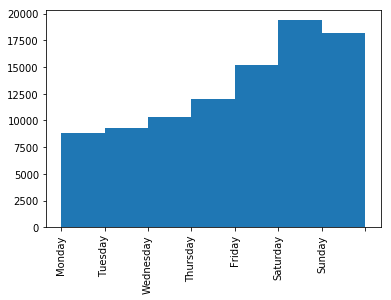

In [11]:
bins = [0,1,2,3,4,5,6,7]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.hist(weekday,bins)
plt.xticks(bins, labels, rotation=90)
plt.show()
#g=sns.distplot(weekday,bins=bins,kde=True)
#g.set(x= labels)
#g.set_xticklabels(labels,rotation=30)

>  __Plot shows usage is higher during weekends than the weekdays. Also there is continuous increase from Monday to Friday__

## Part 2

Experiment and metrics design The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
There are a couple ways that the success of that experiment could be measured. The initial way would be to measure if the distance driven of drivers from both cities went up relatice to other cities. A more accurate measurement would likely be if the weekday driving percentage of drivers from both cities went up compared to the data from all other cities. Having drivers more flexibly in both cities should bring down the avg surge percentage in both cities. Ideally the number of cross city pairs (drivers with riders) should greatly increase.

If the percentage of cross city driver/rider pairs is a measurement that should dirrectly show how effective the result is.

a. Ideally you find two weeks that are similar, two weeks right next to eachother without any major holidays or events should be statistically similar. Then you use one of the weeks as a control to measure against (go with the first, because that is the existing setup and couldn't be changed by a past week. You then compare the results of the normal week and treatment week (where you gave the wavers). The comparison is done with a z-test to see if the mean is possible due to random deviation.

b. statistical tests - z-test A z-test is used to determine whether two samples have the same mean and therefore are statistically similar sets of data. It assumes normal distribution and there must be more than 30 samples.

The code would look roughly like: "from statsmodels.stats import weightstats as stests testResult=stests.ztest(treatmentData,value=controlMean)"

where controlMean is equal to the mean of the control group and the treatmentData would be the data list from the other group.

c. interpret If the testResult (the p-value) is <.025 then the difference in mean is statistically significant and the toll reimbursements were successful. So if the p-value is less than .025 the mean of the test with the reimbursement had a statistically signifigant change in the number of driver/rider pairs from each of the two cities. It would be wise to other compare to a completely unrelated city in the same week to help verify that other data such as press could not have affected the results.

## Part3

Predictive modeling Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice)

In [12]:
# Loading data
import json
file_open2 = open('ultimate_data_challenge.json')
file_str2 = file_open2.read()
json_data = json.loads(file_str2)
data2 = pd.DataFrame.from_dict(json_data)

In [13]:
#change times from str to datetimes
data2['last_trip_date'] = pd.to_datetime(data2.last_trip_date,format='%Y-%m-%d')
data2['signup_date'] = pd.to_datetime(data2.signup_date,format='%Y-%m-%d')

datePulledDate = max(data2['last_trip_date'])
cutoff = datePulledDate-timedelta(days=30)
data2['retention'] = data2.last_trip_date>=cutoff
print(data2[:2])

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7        1.1   
1      8.26                   5.0                   5.0        1.0   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  retention  
0                       4                 True         46.2       True  
1                       0                False         50.0      False  


In [14]:
print(100*sum(data2.retention)/len(data2),'percent active')

37.608 percent active


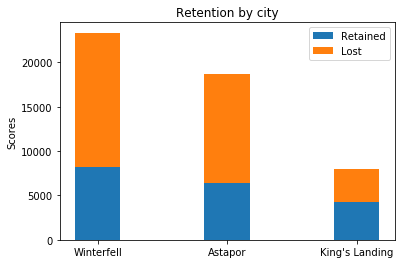

In [15]:
#create a general plot instance to show the different data
import numpy as np
import matplotlib.pyplot as plt

#general plot
def Plotbar(category = 'city'):
    x_ret = data2[data2.retention==True][category]
    x_lost = data2[data2.retention==False][category]
    vc_ret = x_ret.value_counts()
    vc_lost = x_lost.value_counts()
    vc_ret.sort_index()
    vc_lost.sort_index()
    N=len(vc_lost)
    #ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(list(vc_lost.keys()), vc_ret, width)
    p2 = plt.bar(list(vc_lost.keys()), vc_lost, width, bottom=vc_ret)

    plt.ylabel('Scores')
    plt.title('Retention by ' +category)
    plt.xticks(list(vc_lost.keys()), list(vc_lost.keys()))
    plt.legend((p1[0], p2[0]), ('Retained', 'Lost'))

    plt.show()

Plotbar('city')

>  __Winterfell have higher number of Users and so is the Lost users. King's Landing have retained more customers.__

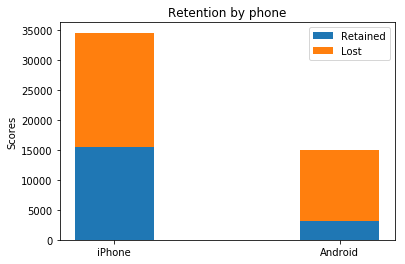

In [16]:
Plotbar('phone')

>  __iPhone have more lost Users compared to Android__

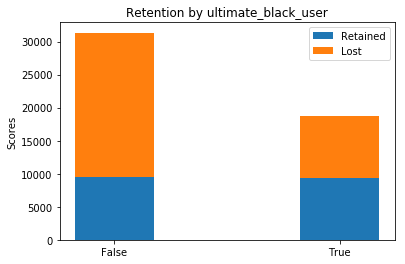

In [17]:
Plotbar('ultimate_black_user')

>  __Users who used uber black had much higher retention and whether that is correlation or causation should be investigated__

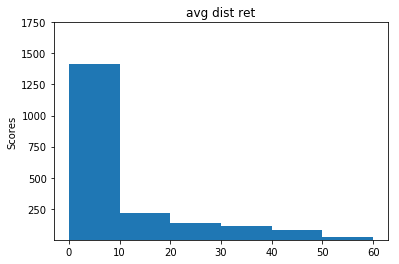

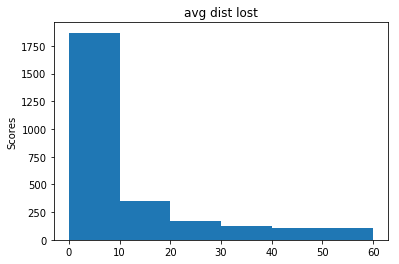

In [18]:
# Plotting other metrics
def dfPlot(category,binpos=None,ytickpos=None):
    x_ret = data2[data2.retention==True][category]
    x_lost = data2[data2.retention==False][category]
    vc_ret = x_ret.value_counts()
    vc_lost = x_lost.value_counts()
    #vc_ret.sort_index()
    vc_lost.sort_index()
    N=len(vc_lost)
    #ind = np.arange(N)    # the x locations for the groups
    #width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.hist(vc_ret, bins= binpos)

    plt.ylabel('Scores')
    plt.title('avg dist ret')
    if ytickpos != None:
        plt.yticks(ytickpos)
    plt.show()
    p2 = plt.hist(vc_lost, bins= binpos)
    plt.ylabel('Scores')
    plt.title('avg dist lost')
    plt.show()
    
dfPlot('avg_dist',[0,10,20,30,40,50,60],[250,500,750,1000,1250,1500,1750])

avg_rating_by_driver
Retained mean:  4.762771739130456


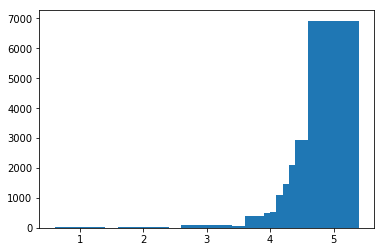

Lost mean:  4.787464148754435


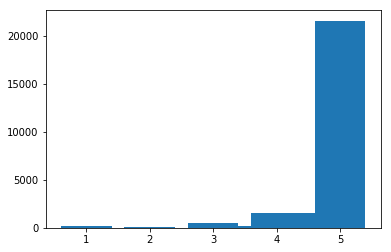

In [19]:
x_ret = data2[data2.retention==True]['avg_rating_by_driver']
x_lost = data2[data2.retention==False]['avg_rating_by_driver']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('avg_rating_by_driver')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('Lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

avg_rating_of_driver
Retained mean:  4.592930351735465


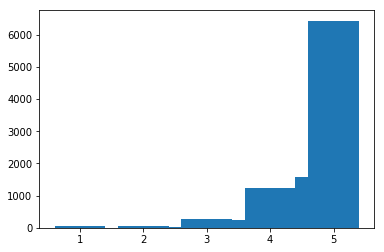

lost mean:  4.607556868776835


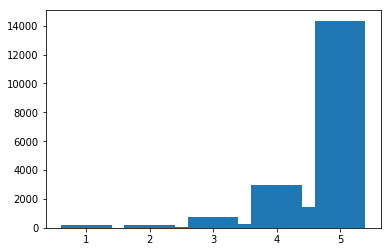

In [20]:
x_ret = data2[data2.retention==True]['avg_rating_of_driver']
x_lost = data2[data2.retention==False]['avg_rating_of_driver']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('avg_rating_of_driver')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

surge_pct
Retained mean:  9.152797277175118


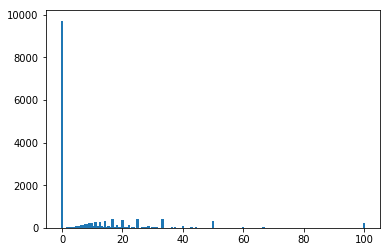

lost mean:  8.666739325554499


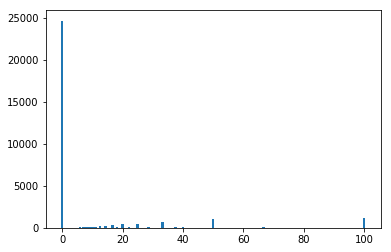

In [21]:
x_ret = data2[data2.retention==True]['surge_pct']
x_lost = data2[data2.retention==False]['surge_pct']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('surge_pct')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

Retained mean:  1.073809295894508


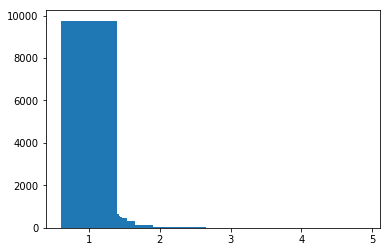

lost mean:  1.075339146044379


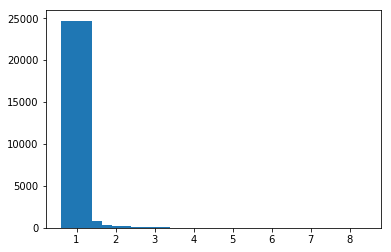

In [22]:
x_ret = data2[data2.retention==True]['avg_surge']
x_lost = data2[data2.retention==False]['avg_surge']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

weekday_pct
Retained mean:  61.3890342480323


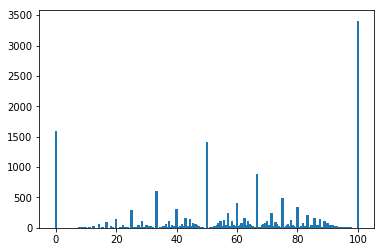

lost mean:  60.64703167072686


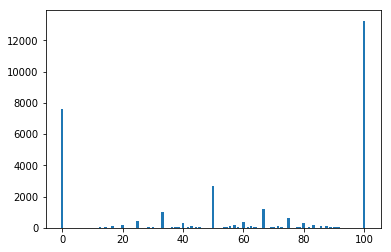

In [23]:
x_ret = data2[data2.retention==True]['weekday_pct']
x_lost = data2[data2.retention==False]['weekday_pct']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('weekday_pct')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

In [24]:
print(max(data2.last_trip_date)-min(data2.signup_date))

181 days 00:00:00


In [25]:
#import needed functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#eliminate all non-numerical data before classification
data2['signup_date_year'] = pd.Series([date.year for date in data2['signup_date']])
data2['signup_date_month'] = pd.Series([date.month for date in data2['signup_date']])
data2['signup_date_day'] = pd.Series([date.day for date in data2['signup_date']])

data2['phone'] = data2['phone'].astype("category").cat.codes
data2['city'] = data2['city'].astype("category").cat.codes
data2.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
retention                    0
signup_date_year             0
signup_date_month            0
signup_date_day              0
dtype: int64

In [26]:
print(data2['avg_rating_by_driver'].median())

5.0


In [27]:
data2['avg_rating_by_driver'] = data2['avg_rating_by_driver'].fillna(value = data2['avg_rating_by_driver'].median())
data2['avg_rating_of_driver'] = data2['avg_rating_of_driver'].fillna(value = data2['avg_rating_of_driver'].median())

In [28]:
#randomly split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(\
    data2.drop('retention',axis=1)\
    .drop('signup_date',axis=1)\
    .drop('last_trip_date',axis=1),\
    data2.retention, \
    test_size=0.33, \
    random_state=42)

#instatiate and train classifier
clf = RandomForestClassifier(class_weight='balanced_subsample')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
report = classification_report(y_true = np.array(y_test), y_pred = predictions)
print(report)

             precision    recall  f1-score   support

      False       0.78      0.86      0.82     10305
       True       0.72      0.59      0.65      6195

avg / total       0.75      0.76      0.75     16500



Feature ranking:
1. avg_dist (0.210432)
2. avg_rating_by_driver (0.140604)
3. signup_date_day (0.135309)
4. weekday_pct (0.114188)
5. trips_in_first_30_days (0.076024)
6. city (0.075133)
7. avg_rating_of_driver (0.071339)
8. surge_pct (0.063376)
9. avg_surge (0.044934)
10. phone (0.037088)
11. ultimate_black_user (0.031574)
12. signup_date_month (0.000000)
13. signup_date_year (0.000000)


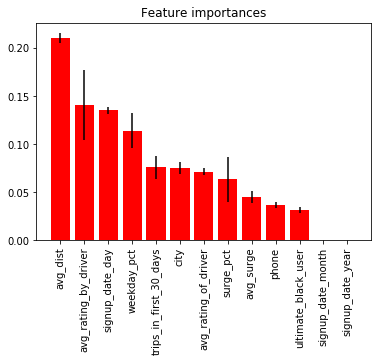

In [29]:
#back calculate which features have the highest predictive importance for retention
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices[f]], importances[indices[f]]))
    #print("%d. %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(X_train.columns.values, indices)
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()